In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

In [109]:
#data = np.fromfile('C:/Users/heeir/OneDrive/Dokumenter/samples5.bin', dtype='float32')
#reshaped_data = data.reshape((-1, 2))
#np.savetxt('C:/Users/heeir/OneDrive/Dokumenter/samples6.csv', data, delimiter=',', fmt='%f')
#df = df = pd.read_csv('C:/Users/heeir/OneDrive/Dokumenter/samples6.csv')
#df = reshaped_data
#df

In [110]:
df = pd.read_csv('lte_band2_samples.csv')
df
df.columns = ['I', 'Q']

In [111]:
df = df.rename(columns={None: 'Combined IQ data'})
# Separate I and Q data
I_data = df.loc[:, 'I']  # First column for I data
Q_data = df.loc[:, 'Q']  # Second column for Q data
# Combine I and Q data into complex numbers
df['IQ_complex'] = df.apply(lambda row: complex(row['I'], row['Q']), axis=1)
df

,I,Q,IQ_complex
0,249,386,249.0+386.0j
1,16,376,16.0+376.0j
2,-165,185,-165.0+185.0j
3,-313,186,-313.0+186.0j
4,104,203,104.0+203.0j
...,...,...,...
10234,-162,77,-162.0+77.0j
10235,-269,-297,-269.0-297.0j
10236,-481,-156,-481.0-156.0j
10237,1,-192,1.0-0192.00j


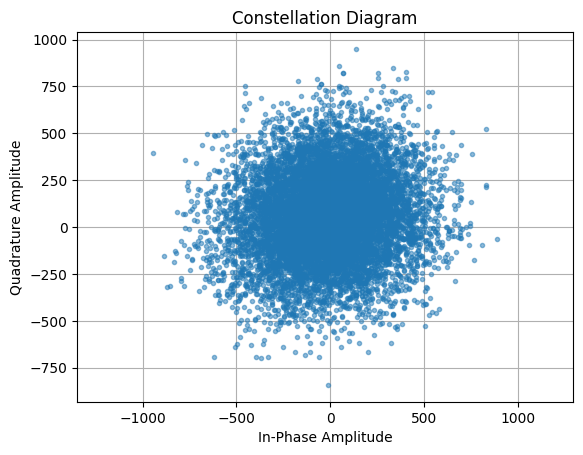

In [112]:
IQ_complex = df['IQ_complex'].values
plt.figure()
plt.plot(IQ_complex.real,IQ_complex.imag, '.', alpha=0.5)
plt.title('Constellation Diagram')
plt.xlabel('In-Phase Amplitude')
plt.ylabel('Quadrature Amplitude')
plt.grid(True)
plt.axis('equal')  # To ensure the axis scales are equal for a proper constellation shape
plt.show()

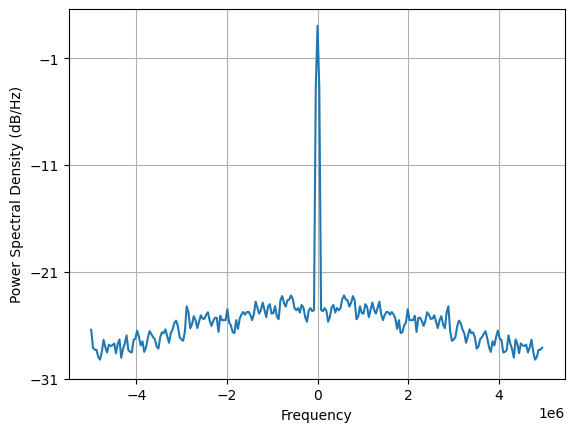

In [113]:
iq_magnitude = np.abs(IQ_complex)
plt.psd(iq_magnitude, Fs = 10000000, sides = 'twosided');